<a href="https://colab.research.google.com/github/1900690/kyouyu/blob/main/%E7%94%BB%E5%83%8F%E3%81%AE%E6%B0%B4%E5%A2%97%E3%81%97%E3%81%A8%E3%83%9E%E3%82%B9%E3%82%AF%E7%94%BB%E5%83%8F%E4%BD%9C%E6%88%90.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##※グーグルドライブをマウント

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import shutil

#フォルダをコピー
shutil.copyfile("/content/drive/MyDrive/バラ画像/roze-reaf-rinkaku-resize.zip", "/content/roze-reaf-rinkaku-resize.zip")
shutil.copyfile("/content/drive/MyDrive/バラ画像/semantic_segmentations.zip", "/content/semantic_segmentations.zip")
shutil.copyfile("/content/drive/MyDrive/バラ画像/background_image_resize.zip", "/content/background_image_resize.zip")
#フォルダを解凍
!unzip -q roze-reaf-rinkaku-resize.zip
!unzip -q semantic_segmentations.zip
!unzip -q background_image_resize.zip

##※ローカルから画像を入手する場合

画像の入ったフォルダをzip化(日本語は文字化けする)、ダウンロードののち、以下のコードで解凍

In [ ]:
!unzip -q roze-reaf-rinkaku-resize.zip

##※まとめてリネーム

In [5]:
import glob
import os
 
# ファイルを取得する
path = '/content/background_image/*'
i = 1
 
# ファイルリストを取得する
flist = glob.glob(path)
print('変更前')
print(flist)
 
# ファイル名を一括で変更する
for file in flist:
  os.rename(file, '/content/background_image/' + str(i) + '.jpg')
  i+=1
 
list = glob.glob(path)
print('変更後')
print(list)

変更前
['/content/background_image/DSC_0228.jpg', '/content/background_image/DSC_0237.jpg', '/content/background_image/DSC_0259.jpg', '/content/background_image/DSC_0248.jpg', '/content/background_image/DSC_0233.jpg', '/content/background_image/IMG_20220427_102816.jpg', '/content/background_image/DSC_0236.jpg', '/content/background_image/DSC_0262.jpg', '/content/background_image/DSC_0244.jpg', '/content/background_image/IMG_20220427_103337.jpg', '/content/background_image/DSC_0258.jpg', '/content/background_image/IMG_20220427_103502.jpg', '/content/background_image/IMG_20220427_103057.jpg', '/content/background_image/DSC_0265.jpg', '/content/background_image/DSC_0232.jpg', '/content/background_image/DSC_0245.jpg', '/content/background_image/DSC_0234.jpg', '/content/background_image/DSC_0238.jpg', '/content/background_image/IMG_20220427_103312.jpg', '/content/background_image/IMG_20220427_104315.jpg', '/content/background_image/IMG_20220427_104042.jpg', '/content/background_image/DSC_0254.

## ※画像サイズ変更

In [6]:
!pip install Pillow
import os
from PIL import Image
from google.colab import drive,files

%cd /content
!mkdir background_image_resize

dir_name = "/content/background_image"
new_dir_name = "/content/background_image_resize"
files = os.listdir(dir_name)

for file in files:
    photo = Image.open(os.path.join(dir_name, file))
    if photo.size[0] == 3120:
      photo_resize = photo.resize((433,577))
    else:
      photo_resize = photo.resize((577,433))
    photo_resize.save(os.path.join(new_dir_name, file))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content


##※フォルダを圧縮

In [7]:
!cd "/content" && zip -q "background_image_resize.zip" -r "background_image_resize"

#背景処理画像を作成
[remobe.bg](https://www.remove.bg/ja)にアクセスして、背景消去した画像を作成する

※フォルダには生画像、背景処理画像をセットで入れておく

#画像の仕分け

画像のリストを取得し、生画像、背景処理画像それぞれのフォルダに入れる

In [8]:
#参考https://kino-code.com/files-move/
import os
import shutil
#作成するフォルダネーム
file_extensions = ['jpg','png']
file_extensions 

#読み取りたいディレクトリパスを入れる
read_path = 'roze-reaf-rinkaku-resize'#★読み取るフォルダネームに合わせて変更
read_files = os.listdir(read_path)

#拡張子リストを取得するフォー文を追加する。
for file_extension in file_extensions:
  if not os.path.exists(file_extension):
    os.mkdir(file_extension)

  #指定の拡張子だけのファイル名をリストを作る
  file_list = []
  for file_name in read_files:
      if file_name.endswith(file_extension):
          file_list.append(file_name)

  #read_listから、指定の拡張子のファイルだけ指定のディレクトリにコピーする
  for file_name in file_list:
      copy_from = './' + read_path + '/' + file_name    
      copy_to = './' + file_extension + '/' + file_name 
      shutil.copy2(copy_from, copy_to)

#マスク画像を取得

jpgフォルダには元の画像を、maskフォルダにはマスク画像を入れる。それぞれのセットごとに同じ名前を付けること

アルファチャンネル（透過度）のみ取得

In [9]:
import cv2
from matplotlib import pyplot as plt
import glob

#jpgフォルダのリストを取得
LOAD_FOLDA = 'png'
LOAD_NAME = os.listdir(LOAD_FOLDA)


#マスクフォルダを作成
SAVE_NAME = 'mask'
if not os.path.exists('./' +SAVE_NAME):
    os.mkdir('./' +SAVE_NAME)

#マスク画像を作るためのfor文
for file_name in LOAD_NAME:

  IMAGE_PATH='/content/' + LOAD_FOLDA +'/'+file_name
  image = cv2.imread(IMAGE_PATH, cv2.IMREAD_UNCHANGED)# 画像を読み込んでNumPy配列を作成
  alpha_image = image[:,:,3]# スライスを利用してアルファチャンネルのみを切り出し
  cv2.imwrite('/content/'+SAVE_NAME+'/'+file_name, alpha_image)# 画像ファイルとして保存

#マスク画像の名前を置き換えるためのfor文
FILE_PASS=glob.glob('/content/mask/*')

for name in FILE_PASS:
  #nameの名前をRENAMEへ変更
  RENAME=name.replace('-removebg-preview', '')
  os.rename(name, RENAME)

#カラー画像を取得

In [10]:
import cv2
from matplotlib import pyplot as plt
import glob

color_list = [(255,0,0),(0,255,0),(0,0,255),(255,255,0),(0,255,255),(255,255,255)]


#maskフォルダのリストを取得
LOAD_FOLDA = 'mask'
LOAD_NAME = os.listdir(LOAD_FOLDA)


#colerを作成
SAVE_NAME = 'coler'
if not os.path.exists('./' +SAVE_NAME):
    os.mkdir('./' +SAVE_NAME)

#coler画像を作るためのfor文
for file_name in LOAD_NAME:
  im = cv2.imread('/content/'+LOAD_FOLDA+'/'+file_name,flags=cv2.IMREAD_GRAYSCALE)
  contours, hierarchy = cv2.findContours(im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

  img2 = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
  for i in range(len(contours)):
      cnt = contours[i]
      img2 = cv2.drawContours(img2, [cnt], 0, color_list[i], -1)
  arfa_image = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  
  cv2.imwrite('/content/'+SAVE_NAME+'/'+file_name, arfa_image)# 画像ファイルとして保存

#カラーコードをHEX形式でtxtに出力
fname = '/content/'+SAVE_NAME+'/'+'coler_code.txt'
f = open(fname,'w')
for i in color_list:
  html_color='#%02X%02X%02X' % i+"\n"
  f.write(html_color)
f.close()

##読み込んだ画像を表示する場合

・OpenCVを使って画像を読み込む cv2.imreadでOpenCV形式に変換 OpenCVはBGRなのでcvtColorでRGBに直してから表示する

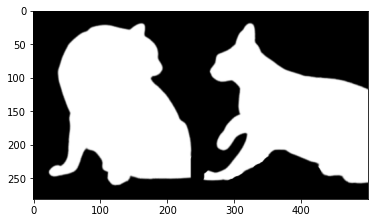

In [ ]:
import cv2
from matplotlib import pyplot as plt
image_name='/content/mask/2neko.png'
orig = cv2.imread(image_name)
src = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(src)

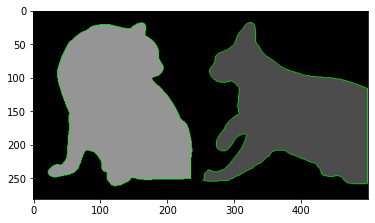

In [ ]:
im = cv2.imread(image_name,flags=cv2.IMREAD_GRAYSCALE)
contours, hierarchy = cv2.findContours(im,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
#drawContoursの最後の引数で輪郭描画線の太さが指定できる。
img = cv2.drawContours(img, contours, -1, (0,255,0), 1)
plt.imshow(img)
plt.show()

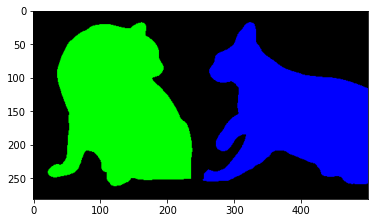

True

In [ ]:
img2 = cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)
color_list = [(255,0,0),(0,255,0),(0,0,153),(0,0,204),(0,0,255)]

for i in range(len(contours)):
    cnt = contours[i]
    img2 = cv2.drawContours(img2, [cnt], 0, color_list[i], -1)
arfa_image = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(arfa_image)
plt.show()
cv2.imwrite(image_name, arfa_image)# 画像ファイルとして保存

#cocoファイルを出力

ライブラリインポート

In [ ]:
import json
import collections as cl
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure
from skimage.segmentation import clear_border
from skimage.filters import threshold_otsu
import cv2
import glob
import sys
import os

関数定義

問題点

*複数枚の葉が写った画像に対応させる必要がある

##〇roboflow形式

In [ ]:
### https://qiita.com/harmegiddo/items/da131ae5bcddbbbde41f

def info():
    tmp = cl.OrderedDict()
    tmp["year"] = "2022"
    tmp["version"] = "1"
    tmp["description"] = "Exported from roboflow.ai"
    tmp["contributor"] = ""
    tmp["url"] ="https://public.roboflow.ai/object-detection/undefined"
    tmp["data_created"] = "2022"
    return tmp

def licenses():
    tmp = cl.OrderedDict()
    tmp["id"] = 1
    tmp["url"] = "https://creativecommons.org/licenses/by/4.0/"
    tmp["name"] = "CC BY 4.0"
    return tmp

def categories():
    tmps = []
    sup = ["none","reaf","reaf","reaf","reaf","reaf"]
    cat = ["reaf","reaf1","reaf2","reaf3","reaf4","reaf5"]

    for i in range(len(sup)):
        tmp = cl.OrderedDict()
        tmp["id"] = i
        tmp["name"] = cat[i]
        tmp["supercategory"] = sup[i]
        tmps.append(tmp)
    return tmps

def images(mask_path):
    tmps = []
    files = glob.glob(mask_path + "/*.png")
    files.sort()

    for i, file in enumerate(files):
        img = cv2.imread(file, 0)
        height, width = img.shape[:3]

        tmp = cl.OrderedDict()
        tmp["id"] = i
        tmp["license"] = 1
        tmp["file_name"] = os.path.basename(file.replace('png', 'jpg'))
        tmp["height"] = height
        tmp["width"] = width
        tmp["date_captured"] = ""
        tmps.append(tmp)
    return tmps


def annotations(mask_path):
    tmps = []

    files = glob.glob(mask_path + "/*.png")
    files.sort()
    
    for i, file in enumerate(files):
        img = cv2.imread(file, 0)
        tmp = cl.OrderedDict()
        contours = measure.find_contours(img, 0.5)
        segmentation_list = []

        for contour in contours:
            for a in contour:
                segmentation_list.append(a[1])
                segmentation_list.append(a[0])


        mask = np.array(img)
        obj_ids = np.unique(mask)
        obj_ids = obj_ids[1:]
        masks = mask == obj_ids[:, None, None]
        num_objs = len(obj_ids)
        boxes = []

        for j in range(num_objs):
            pos = np.where(masks[j])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        tmp_segmentation = cl.OrderedDict()

        tmp["id"] = i
        tmp["image_id"] = i
        tmp["category_id"] = 1
        tmp["bbox"] =  [float(boxes[0][0]), float(boxes[0][1]), float(boxes[0][3] - boxes[0][1]), float(boxes[0][2] - boxes[0][0])]
        tmp["area"] = float(boxes[0][3] - boxes[0][1]) * float(boxes[0][2] - boxes[0][0])
        tmp["segmentation"] = [segmentation_list]
        tmp["iscrowd"] = 0        
        tmps.append(tmp)
    return tmps



def main(mask_path, json_name):
    query_list = ["info", "licenses", "categories", "images", "annotations"]
    js = cl.OrderedDict()
    for i in range(len(query_list)):
        tmp = ""
        # Info
        if query_list[i] == "info":
            tmp = info()
            
        # licenses
        elif query_list[i] == "licenses":
            tmp = licenses()

        elif query_list[i] == "categories":
            tmp = categories()

        elif query_list[i] == "images":
            tmp = images(mask_path)

        elif query_list[i] == "annotations":
            tmp = annotations(mask_path)

        # save it
        js[query_list[i]] = tmp

    # write
    fw = open(json_name,'w')
    json.dump(js,fw,indent=2)

#main
#args = sys.argv
#mask_path = args[1]
mask_path =  "/content/mask"
#json_name = args[2]
json_name = "reaf-roboflow.json"

if __name__=='__main__':
    main(mask_path, json_name)

##〇FastLabel形式

In [ ]:
### https://docs.fastlabel.ai/docs/import-annotation

def images(mask_path):
    tmps = []
    files = glob.glob(mask_path + "/*.png")
    files.sort()

    for i, file in enumerate(files):
        img = cv2.imread(file, 0)
        height, width = img.shape[:3]

        tmp = cl.OrderedDict()
        tmp["file_name"] = os.path.basename(file.replace('png', 'jpg'))
        tmp["id"] = i+1
        tmps.append(tmp)
    return tmps

def categories():
    tmps = []
    sup = ["reaf"]

    for i in range(len(sup)):
        tmp = cl.OrderedDict()
        tmp["id"] = i+1
        tmp["supercategory"] = sup[0]
        tmps.append(tmp)
    return tmps


def annotations(mask_path):
    tmps = []

    files = glob.glob(mask_path + "/*.png")
    files.sort()
    
    for i, file in enumerate(files):
        img = cv2.imread(file, 0)
        tmp = cl.OrderedDict()
        contours = measure.find_contours(img, 0.5)
        segmentation_list = []

        for contour in contours:
            for a in contour:
                segmentation_list.append(a[1])
                segmentation_list.append(a[0])


        mask = np.array(img)
        obj_ids = np.unique(mask)
        obj_ids = obj_ids[1:]
        masks = mask == obj_ids[:, None, None]
        num_objs = len(obj_ids)
        boxes = []

        for j in range(num_objs):
            pos = np.where(masks[j])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        tmp_segmentation = cl.OrderedDict()
        tmp["segmentation"] = [segmentation_list]

        tmp_segmentation = cl.OrderedDict()
        tmp["image_id"] = i
        tmp["category_id"] = 1
        tmp["id"] = i        
        tmps.append(tmp)
    return tmps



def main(mask_path, json_name):
    query_list = ["images","categories","annotations"]
    js = cl.OrderedDict()
    for i in range(len(query_list)):
        tmp = ""
        # Info
        if query_list[i] == "images":
            tmp = images(mask_path)

        elif query_list[i] == "categories":
            tmp = categories()

        elif query_list[i] == "annotations":
            tmp = annotations(mask_path)

        # save it
        js[query_list[i]] = tmp

    # write
    fw = open(json_name,'w')
    json.dump(js,fw,indent=2)

#main
#args = sys.argv
#mask_path = args[1]
mask_path =  "/content/mask"
#json_name = args[2]
json_name = "reaf-fastlabel.json"

if __name__=='__main__':
    main(mask_path, json_name)

#背景合成



True

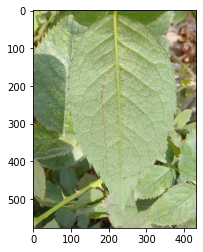

In [81]:
import cv2
import numpy as np
#背景合成のためにはpng,jpgフォルダが必要

img1 = cv2.imread('/content/png/1-removebg-preview.png')#合成する葉の画像
img2 = cv2.imread('/content/background_image_resize/1.jpg')#合成する背景の画像
img3 = np.array(Image.open('/content/png/1-removebg-preview.png'))#葉の画像のマスク

#アルファ情報をスライス
ALPHA = np.array(img3[:, :, 3], dtype=np.int16)
ALPHAtest = np.array(img3[:, :, 3], dtype=np.int16)

#掛け算のために0->1に置き換えし逆転したアルファ画像を作る
ALPHA=np.where(ALPHA<144, 0, 1)
ALPHA_INV=np.where(ALPHA==0, 1, 0)
#retval,r2 = cv2.threshold(r, 0, 255, cv2.THRESH_BINARY)#二値化
#r= cv2.blur(r,(6, 6))#ぼかす


#マスクに合わせて掛け算
for i in list(range(3)):
  img1[:,:,i]=ALPHA*img1[:,:,i]
  img2[:,:,i]=ALPHA_INV*img2[:,:,i]

#足し算で合成
img=img1+img2

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

cv2.imwrite('/content/new.jpg', img)
#np.savetxt('/content/ALPHAtest.txt',ALPHAtest,fmt='%d')

#オーグメンテーション
*   roboflowオーグメンテーションは最大３倍までしかできないので、先にいくつかの画像加工を行っておくとよい


1.   このノートブックでオーグメンテーションしたjpgとmaskのペアを作成
2.   作成したペアをFastLabelで修正
3.   FastLabelでcoco.jsonとオリジナル画像をエクスポート
4.   roboflowで読み込み追加のオーグメンテーションを行う








In [97]:
#関数定義
import numpy as np
from PIL import Image

#複数画像表示関数
def mkfig_imshow(dat,title):
    fig, ax = plt.subplots()
    ax.set_title(title)
    img = ax.imshow(dat, cmap=plt.cm.jet, interpolation='nearest', origin='upper')
    return fig

def horizontal_flip(image):
    image = image[:, ::-1, :]
    return image

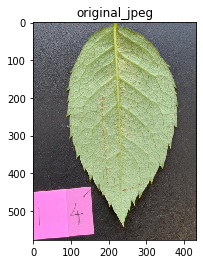

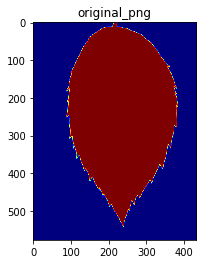

In [98]:
#実行部
image_jpg = np.array(Image.open('/content/jpg/1.jpg'), dtype=np.float32)/255
image_png = np.array(Image.open('/content/mask/1.png'), dtype=np.float32)/255

fig1 = mkfig_imshow(image_jpg,'original_jpeg')
fig2 = mkfig_imshow(image_png,'original_png')
#fig3 = mkfig_imshow(horizontal_flip(image_jpg),'horizontal_flip_jpeg')
#fig4 = mkfig_imshow(horizontal_flip(image_png),'horizontal_flip_png')
plt.show()

#分けてzip化する

In [ ]:
#参考https://kino-code.com/files-move/
import os
import shutil
import zipfile

DOWNLOAD_FILE_NAME="zip_coler"

#l行のリストをn分割する関数
def split_list(l, n):
    for idx in range(0, len(l), n):
        yield l[idx:idx + n]

#作成するフォルダネーム
file_extensions = list(range(0,10))
split_list_number=10#分割する個数

#読み取りたいディレクトリパスを入れる
read_path = 'coler'#★読み取るフォルダネームに合わせて変更
read_files = os.listdir(read_path)

#拡張子リストを取得するフォー文を追加する。
for i in file_extensions:
  if not os.path.exists(str(i)):
    os.mkdir(str(i))

#指定の拡張子だけのファイル名をリストを作る
file_list = list(split_list(read_files, split_list_number))

  #read_listから、指定の拡張子のファイルだけ指定のディレクトリにコピーする
for i in file_extensions:
  for file_name in file_list[i]:
    copy_from = './' + read_path + '/' + file_name    
    copy_to = './' + str(i) + '/' + file_name 
    shutil.copy2(copy_from, copy_to)

if not os.path.exists('/content/'+DOWNLOAD_FILE_NAME):
  os.mkdir(DOWNLOAD_FILE_NAME)

  # ZIPファイルを作成
for i in file_extensions:
  shutil.make_archive(str(i), format='zip', root_dir='/content/'+str(i))

In [ ]:
#フォルダを移動
for i in file_extensions:
  if not os.path.exists('./' + str(i)+'.zip'):
    shutil.move('/content/' + str(i)+'.zip','/content/'+DOWNLOAD_FILE_NAME)

In [ ]:
#元ファイルの消去
for i in file_extensions:
  shutil.rmtree(str(i))
  os.remove('/content/' + str(i)+'.zip')

#まとめたファイルをzip化
shutil.make_archive(DOWNLOAD_FILE_NAME, format='zip', root_dir='/content/'+DOWNLOAD_FILE_NAME)